# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data_combined_df = pd.merge(study_results, mouse_metadata, how = "left", on= ["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_study_data_combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
# Reference:https://www.geeksforgeeks.org/how-to-count-distinct-values-of-a-pandas-dataframe-column/
unique_mouse_id_int = len(pd.unique(mouse_study_data_combined_df['Mouse ID']))

print (unique_mouse_id_int)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

grouped_by_Mouse_ID_Timepoint = mouse_study_data_combined_df.groupby(["Mouse ID","Timepoint"]) #Creates a DataFrame Group By Object

duplicate_mouse_id_timepoint_df = pd.DataFrame(grouped_by_Mouse_ID_Timepoint[["Timepoint"]].count()) # Count occurrences of Timepoint by Mouse ID

duplicate_mouse_id_timepoint_df.loc[duplicate_mouse_id_timepoint_df['Timepoint'] >1] # Find Mouse ID with duplicate Timepoint records

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Reference:https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values
mouse_with_duplicate_records_df = mouse_study_data_combined_df.loc[mouse_study_data_combined_df['Mouse ID'] == 'g989']
mouse_with_duplicate_records_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Reference:https://saturncloud.io/blog/how-to-delete-dataframe-rows-in-pandas-based-on-column-value/#:~:text=To%20delete%20rows%20from%20a%20DataFrame%20based%20on%20a%20specific,of%20row%20labels%20to%20delete.

clean_df = mouse_study_data_combined_df.drop(mouse_study_data_combined_df[mouse_study_data_combined_df['Mouse ID'] == 'g989'].index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
unique_clean_int = len(pd.unique(clean_df['Mouse ID']))

print (unique_clean_int)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_groupby_obj = clean_df.groupby(["Drug Regimen"])

#Reference: https://docs.scipy.org/doc/scipy/reference/stats.html
mean_tumor_volume_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].mean() 
median_tumor_volume_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].median()
tumor_volume_variance_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].var()
tumor_volume_std_dev_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].std()
tumor_volume_std_err_series = drug_regimen_groupby_obj["Tumor Volume (mm3)"].sem()

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume_series,
    "Median Tumor Volume": median_tumor_volume_series,
    "Tumor Volume Variance": tumor_volume_variance_series,
    "Tumor Volume Std.Dev.": tumor_volume_std_dev_series,
    "Tumor Volume Std.Err.": tumor_volume_std_err_series,
})

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

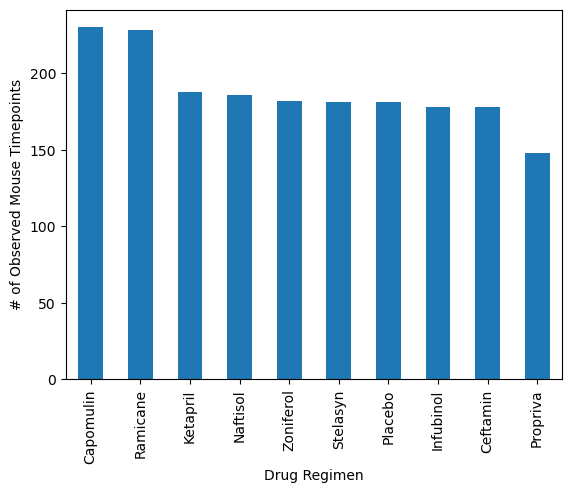

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Filter clean_df to get only the required fields
required_data_columns_df = clean_df[['Timepoint','Drug Regimen']]

# Count timepoints per Drug Regimen
drug_regimen_timepoints_series = required_data_columns_df['Drug Regimen'].value_counts()

figure1 = drug_regimen_timepoints_series.plot(kind = 'bar')
figure1.set_xlabel('Drug Regimen')
figure1.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.



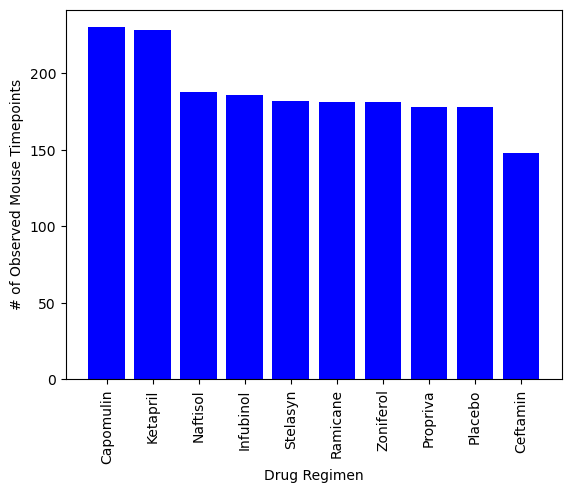

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Reference: https://stackoverflow.com/questions/57383635/how-to-rotate-x-axis-tick-labels-on-matplotlib-bar-chart-tried-several-approach

x_axis = clean_df['Drug Regimen'].unique()   ## X labels in incorrect order - need to fix
usage_of_drug_regimen_series = clean_df['Drug Regimen'].value_counts()

plt.bar(x_axis, usage_of_drug_regimen_series, color = 'b', align = 'center')
xticklabels = usage_of_drug_regimen_series.index
plt.xticks(xticklabels)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

In [12]:
usage_of_drug_regimen_series

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

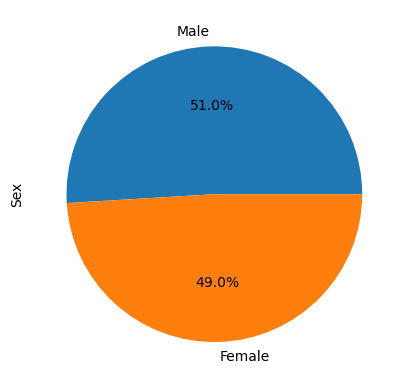

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Male and Female percentages
male_female_mice_df = clean_df['Sex'].value_counts()

figure1 = male_female_mice_df.plot(kind = 'pie', autopct = '%1.1f%%')
figure1.set_ylabel('Sex')
plt.show()

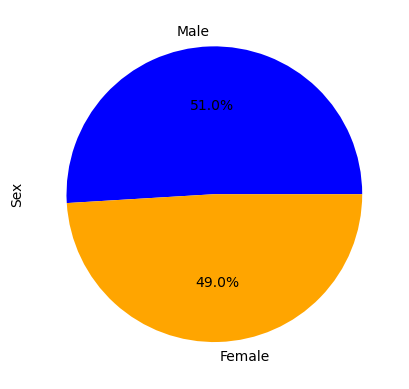

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_male_female = clean_df['Sex'].value_counts()
mice_male_female

labels = ['Male', 'Female']
size = (mice_male_female)
colors = ('blue', 'orange')

plt.pie(size, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

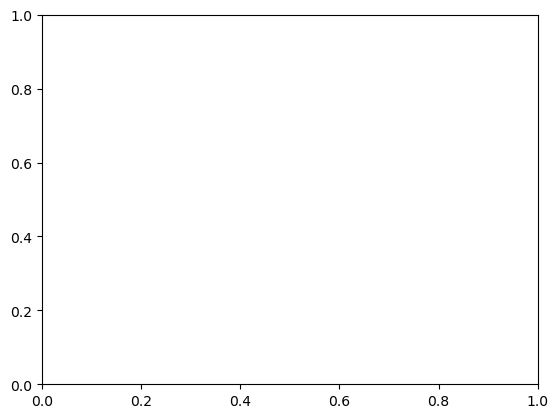

In [16]:
### Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
clean_b128_df = clean_df.loc[clean_df['Mouse ID'] == 'b128']
clean_b128_df

x_axis = [0,5,10,15,20,25,30,35,40,45]
y_axis = [40,41,42,43,44,45,46,47,48]

#x_axis = clean_b128_df['Timepoint']
#x_axis
#y_axis = clean_b128_df['Tumor Volume (mm3)']
#y_axis

plt.plot(x_axis, y_axis)
plt.show()



In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
